# Dhruv Kangavkar-Machine learning lab 3
 ECE-AIML

 PRN:-1032221800

 Date:25/7/24

# **Conclusion:**

In this experiment, Principal Component Analysis (PCA) was effectively implemented to reduce dimensionality while preserving the most significant variance in the data. The reconstruction of the original data from the principal components showed that reducing the number of components leads to less accurate reconstruction and some information loss. This highlights the trade-off between simplifying the data and retaining its original integrity. Overall, PCA demonstrated its usefulness in both reducing dimensionality and revealing the underlying structure of the data.

# **Post lab:**

**1. Give significance of PCA in machine learning.**

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in machine learning. The significance of PCA includes:

Feature Reduction: PCA reduces the dimensionality of data while retaining the most important variance, which can simplify models, reduce computational costs, and mitigate the risk of overfitting.
Noise Reduction: By focusing on the principal components, PCA helps remove noise and redundant features from the data.
Visualization: PCA helps visualize high-dimensional data by projecting it onto a lower-dimensional space, often 2D or 3D.
Data Compression: PCA allows for efficient data storage by representing data in fewer dimensions, which is particularly useful in image and signal processing.


**2. What are advantages and disadvantages of PCA technique?**

**Advantages:**

Simplification: Reduces dataset complexity by lowering the number of features while retaining most variance.

Improved Performance: Helps reduce overfitting in high-dimensional data, improving machine learning performance.

Noise Filtering: Effectively filters out noise, making data more robust.

Uncorrelated Features: Converts correlated features into uncorrelated principal components, aiding some models.


**Disadvantages:**

Loss of Information: Some information is lost when reducing dimensions.

Interpretability: Principal components, being combinations of original features, can be harder to interpret.

Linearity Assumption: PCA assumes linear relationships, which may not hold in all datasets.

Scaling Sensitivity: Requires standardized features, as PCA is sensitive to data scale.

**3. Using PCA, reduce the below 2D data to 1D with proper steps and explanation.**

x| 2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.2

y| 2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9

Steps to Reduce 2D Data to 1D Using PCA:

**Mean Centering:**

Compute the mean of the
x and y data points.
Subtract the mean from each data point to center the data around the origin.

**Covariance Matrix Calculation:**

Calculate the covariance matrix to understand the relationship between the x and y variables.

**Eigenvalues and Eigenvectors:**

Compute the eigenvalues and eigenvectors of the covariance matrix.
The eigenvector with the largest eigenvalue points in the direction of the greatest variance.

**Projection onto Principal Component:**

Project the original data onto the principal component (the eigenvector with the largest eigenvalue).
This projection reduces the 2D data to 1D.

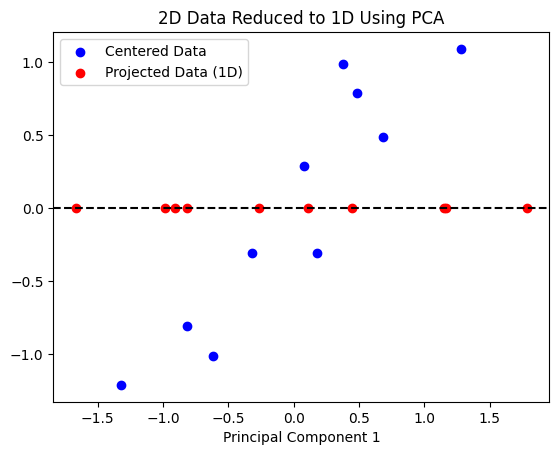

Projected 1D Data: [-0.82002894  1.78329382 -0.98806579 -0.26836447 -1.66760613 -0.90739411
  0.10821993  1.15095768  0.44464335  1.16434467]


In [2]:
#postlab q3
import numpy as np
import matplotlib.pyplot as plt

# Original 2D data
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.2])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# Step 1: Mean centering the data
x_mean = np.mean(x)
y_mean = np.mean(y)

x_centered = x - x_mean
y_centered = y - y_mean

# Combine the centered data
data = np.vstack((x_centered, y_centered)).T

# Step 2: Covariance matrix calculation
cov_matrix = np.cov(data.T)

# Step 3: Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Get the principal component (eigenvector with largest eigenvalue)
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

# Step 4: Projecting data onto the principal component
projected_data = data @ principal_component

# Plotting the original and projected data for visualization
plt.scatter(x_centered, y_centered, color='blue', label='Centered Data')
plt.scatter(projected_data, np.zeros_like(projected_data), color='red', label='Projected Data (1D)')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.xlabel('Principal Component 1')
plt.title('2D Data Reduced to 1D Using PCA')
plt.show()

# Print the projected 1D data
print("Projected 1D Data:", projected_data)


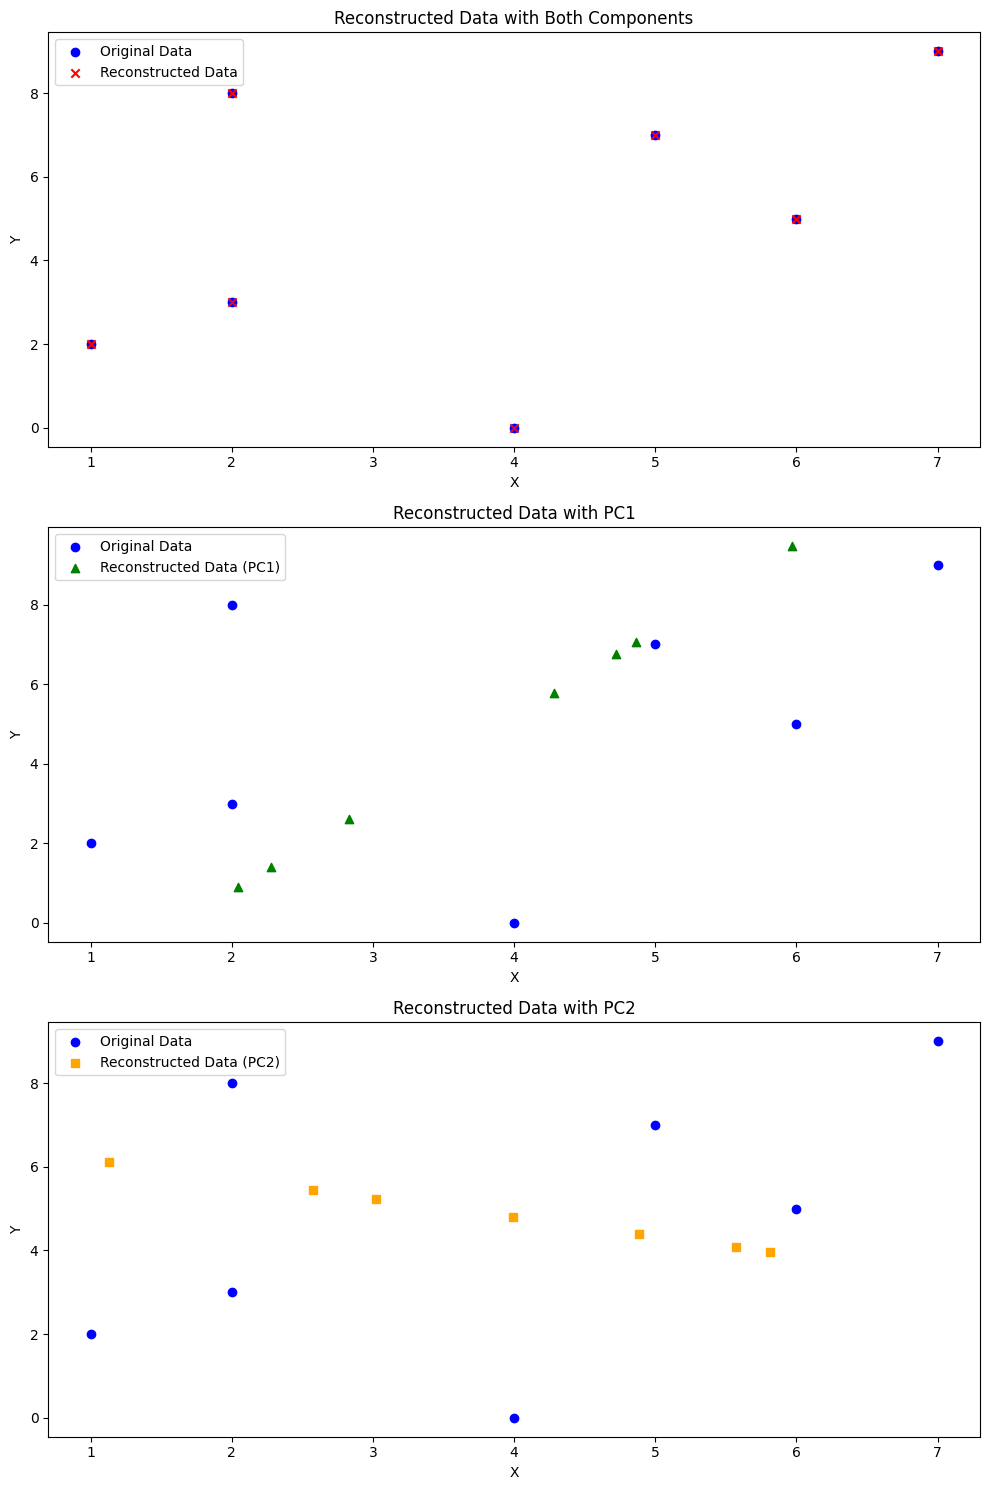

Eigenvalues = [ 3.55113631 12.73457798]

Eigenvectors = [[-0.90921665  0.4163233 ]
 [ 0.4163233   0.90921665]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
data = np.array([
    [6, 5],
    [4, 0],
    [1, 2],
    [2, 3],
    [2, 8],
    [5, 7],
    [7, 9],
])


# Calculate the mean
mean = np.mean(data, axis=0)

# Center the data by subtracting the mean
mean_subtracted_data = data - mean

# Compute covariance matrix
covariance_matrix = np.cov(mean_subtracted_data, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
feature_vector = eigenvectors[:, sorted_indices]
row_feature_vector = feature_vector.T

# Project data onto principal components
final_data = np.dot(row_feature_vector, mean_subtracted_data.T).T

# Reconstruct data from the projections
reconstructed_data_both_components = np.dot(final_data, feature_vector.T) + mean
reconstructed_data_component1 = np.dot(final_data[:, :1], feature_vector[:, :1].T) + mean
reconstructed_data_component2 = np.dot(final_data[:, 1:], feature_vector[:, 1:].T) + mean

# Plotting
plt.figure(figsize=(10, 15))

# Original and Reconstructed Data with both components
plt.subplot(3, 1, 1)
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue', marker='o')
plt.scatter(reconstructed_data_both_components[:, 0], reconstructed_data_both_components[:, 1], label="Reconstructed Data", color='red', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Reconstructed Data with Both Components")

# Reconstructed Data with first principal component
plt.subplot(3, 1, 2)
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue', marker='o')
plt.scatter(reconstructed_data_component1[:, 0], reconstructed_data_component1[:, 1], label="Reconstructed Data (PC1)", color='green', marker='^')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Reconstructed Data with PC1")

# Reconstructed Data with second principal component
plt.subplot(3, 1, 3)
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue', marker='o')
plt.scatter(reconstructed_data_component2[:, 0], reconstructed_data_component2[:, 1], label="Reconstructed Data (PC2)", color='orange', marker='s')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Reconstructed Data with PC2")

plt.tight_layout()
plt.show()

# Print Eigenvalues and Eigenvectors
print("Eigenvalues =", eigenvalues)
print()
print("Eigenvectors =", eigenvectors)


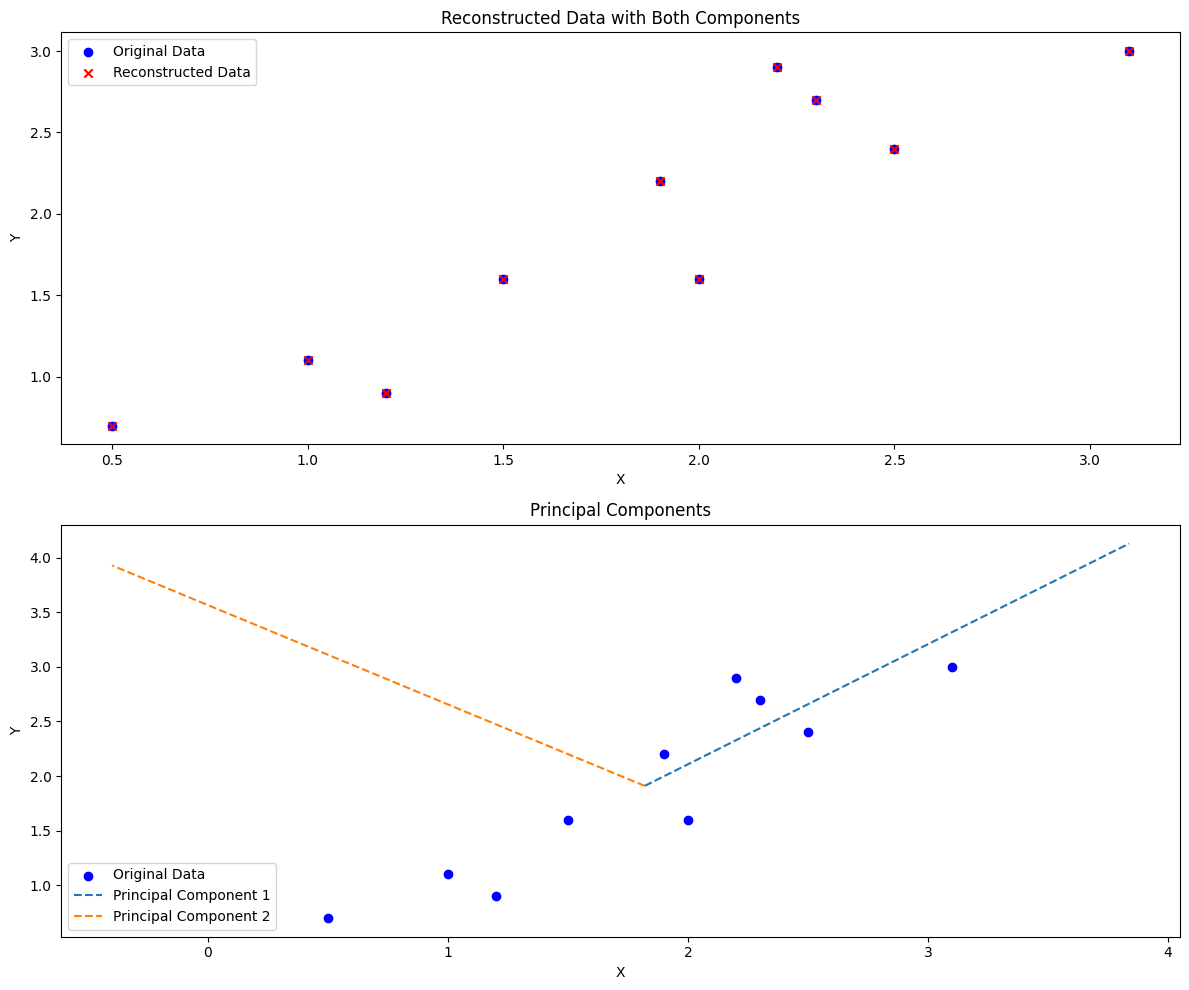

Eigenvalues = [0.05222517 1.26610816]

Eigenvectors = [[-0.7397818   0.67284685]
 [ 0.67284685  0.7397818 ]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.2, 0.9]
])
# Calculate the mean
mean = np.mean(data, axis=0)

# Center the data by subtracting the mean
mean_subtracted_data = data - mean

# Compute covariance matrix
covariance_matrix = np.cov(mean_subtracted_data, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
feature_vector = eigenvectors[:, sorted_indices]
row_feature_vector = feature_vector.T

# Project data onto principal components
final_data = np.dot(row_feature_vector, mean_subtracted_data.T).T

# Reconstruct data from the projections
reconstructed_data_both_components = np.dot(final_data, feature_vector.T) + mean
reconstructed_data_component1 = np.dot(final_data[:, :1], feature_vector[:, :1].T) + mean
reconstructed_data_component2 = np.dot(final_data[:, 1:], feature_vector[:, 1:].T) + mean

# Plotting
plt.figure(figsize=(12, 10))

# Original and Reconstructed Data with both components
plt.subplot(2, 1, 1)
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue', marker='o')
plt.scatter(reconstructed_data_both_components[:, 0], reconstructed_data_both_components[:, 1], label="Reconstructed Data", color='red', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Reconstructed Data with Both Components")

# Plot Principal Components
plt.subplot(2, 1, 2)
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue', marker='o')

# Plot Principal Components lines
origin = mean
for i in range(len(eigenvalues)):
    component = feature_vector[:, i]
    line = np.vstack([origin, origin + 3 * component])  # Extend the line for visualization
    plt.plot(line[:, 0], line[:, 1], label=f"Principal Component {i+1}", linestyle='--')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Principal Components")

plt.tight_layout()
plt.show()

# Print Eigenvalues and Eigenvectors
print("Eigenvalues =", eigenvalues)
print()
print("Eigenvectors =", eigenvectors)


In PCA, principal components are perpendicular because they are eigenvectors of the covariance matrix, which are orthogonal by definition. This orthogonality ensures each component captures unique directions of maximum variance in the data without redundancy.